<a href="https://www.kaggle.com/code/maushamjha/type-of-cancer-data-leakage-nlp-work?scriptVersionId=110422686" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About Dataset :
 This dataset focused on long research paper whose page size more than 6 pages. Dataset includes cancer documents to be classified into 3 categories like 'ThyroidCancer','ColonCancer','Lung_Cancer'.Total publications=7569. it has 3 class labels in dataset.number of samples in each categories:colon cancer=2579, lung cancer=2180, thyroid cancer=2810)



Training the model 2 times:
# 1) Before droping duplicates
# 2) After droping duplicates
and will analyze the result 

# Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from nltk import word_tokenize,sent_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('../input/biomedical-text-publication-classification/alldata_1_for_kaggle.csv',encoding="latin-1")
                 

In [3]:
data.head(2)

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."


# Drop the column unnamed as it is not useful:

In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

# Rename the column into readable form :

In [5]:
data.rename({'0':'cancer','a':'text'},axis=1,inplace=True)

In [6]:
data.tail()

,cancer,text
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."
7569,Colon_Cancer,the periparturient period is one of the most c...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cancer  7570 non-null   object
 1   text    7570 non-null   object
dtypes: object(2)
memory usage: 118.4+ KB


In [8]:
data.isnull().sum()

cancer    0
text      0
dtype: int64

# Apply label encoding on target column(cancer column) to make categorical column into numerical column:

In [9]:
le=LabelEncoder()
data['cancer']=le.fit_transform(data['cancer'])

In [10]:
data.tail()

,cancer,text
7565,0,we report the case of a 24yearold man who pres...
7566,0,among synchronous colorectal cancers scrcs rep...
7567,0,the heterogeneity of cancer cells is generally...
7568,0,"""adipogenesis is the process through which mes..."
7569,0,the periparturient period is one of the most c...


In [11]:
data['cancer'].value_counts()/data['cancer'].count()*100

2    37.120211
0    34.081902
1    28.797886
Name: cancer, dtype: float64

# Distribution is pretty good :

<AxesSubplot:>

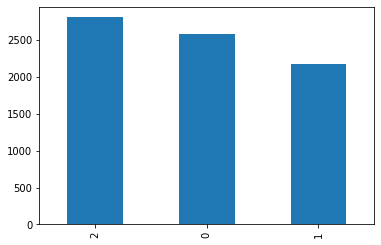

In [12]:
data['cancer'].value_counts().plot(kind='bar')

# Apply text vectorization:
Textual data cannot be used for mathematical operation so text vectorization convert text into vectors and then algorithms can be applied on it

In [13]:
cv=CountVectorizer(max_features=3000)
tfidf=TfidfVectorizer(max_features=4600)
x=tfidf.fit_transform(data['text']).toarray()

In [14]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0619007 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00345469],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
y=data['cancer'].values

# Train test split:

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56,stratify=y)

# Train model without removing duplicates:

In [17]:
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()
def train(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [18]:
l=[gb,mb,bb]
for model in l:
    train(model)
    

GaussianNB()
[[465   0  51]
 [  0 436   0]
 [ 40   0 522]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       516
           1       1.00      1.00      1.00       436
           2       0.91      0.93      0.92       562

    accuracy                           0.94      1514
   macro avg       0.94      0.94      0.94      1514
weighted avg       0.94      0.94      0.94      1514

0.939894319682959
MultinomialNB()
[[411   2 103]
 [  0 436   0]
 [ 61   0 501]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       516
           1       1.00      1.00      1.00       436
           2       0.83      0.89      0.86       562

    accuracy                           0.89      1514
   macro avg       0.90      0.90      0.90      1514
weighted avg       0.89      0.89      0.89      1514

0.8903566710700133
BernoulliNB()
[[361  11 144]
 [  0 436   0]
 [155   9 398]]
              precis

In [19]:
data.duplicated().sum()

6574

## Getting 93% accuracy without removing duplicates, the question is- is this  real accuracy?


# Answer is no
This is not real accuracy of the model, there are 6574 duplicated values more than 60% data is duplicate so the chance of duplicate values coming in test data is also very high that means the value is already seen by the model this is the problem of  data leakage 
which cause overfitting so will again train the model after removing duplicates

In [20]:
data=data.drop_duplicates()
data.size

1992

In [21]:
data.head()

,cancer,text
0,2,Thyroid surgery in children in a single insti...
1,2,""" The adopted strategy was the same as that us..."
2,2,coronary arterybypass grafting thrombosis ï¬b...
3,2,Solitary plasmacytoma SP of the skull is an u...
4,2,This study aimed to investigate serum matrix ...


In [22]:
data['cancer'].value_counts()/data['cancer'].count()*100

1    45.381526
2    28.413655
0    26.204819
Name: cancer, dtype: float64

<AxesSubplot:>

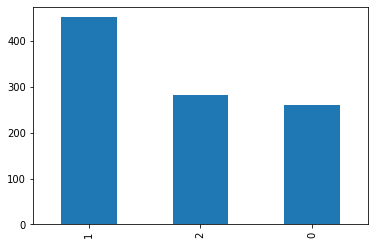

In [23]:
data['cancer'].value_counts().plot(kind='bar')

# Text preprocessing 
# Steps :

1) Converting into lower case

2) Tokenizing : spliting sentences into words

3) Removing special characters

4) Removing stopwords and punctuations

5) Stemming: converting into root words

6) Join to make sentences

In [24]:
#converting into lowercase
data['text']=data['text'].str.lower()
#break into words

data['text']=data['text'].apply(lambda x:word_tokenize(x))
#removing special character
def remove_special_char(list):
    y=[]
    for string in list:
        if string.isalnum():
            y.append(string)
    return y
data['text']=data['text'].apply(lambda x:remove_special_char(x))
#remove stopwords like is am are and punctuations


def useful_words(list):
    y=[]
    for text in list:
         if text not in stopwords.words('english') and text not in string.punctuation:
                y.append(text)
    return y
data['text']=data['text'].apply(lambda x:useful_words(x))
#convert into root words

ps=PorterStemmer()
def stemming(list):
    y=[]
    for text in list:
        y.append(ps.stem(text))
    return y
data['text']=data['text'].apply(lambda x:stemming(x))
#join the words 
data['text']=data['text'].apply(lambda x:" ".join(x))

### Finding total no. of characters,words and sentences 

In [25]:
data['char_count']=data['text'].apply(len)
data['word_count']=data['text'].apply(lambda x:len(word_tokenize(x)))
data['sentence_count']=data['text'].apply(lambda x:len(sent_tokenize(x)))
data

,cancer,text,char_count,word_count,sentence_count
0,2,thyroid surgeri children singl institut osama ...,14480,2012,1
1,2,adopt strategi use prior year base four exclus...,11054,1619,1
2,2,coronari arterybypass graft thrombosi mutation...,14901,1984,1
3,2,solitari plasmacytoma sp skull uncommon clinic...,9961,1261,1
4,2,studi aim investig serum matrix metalloprotein...,16717,2074,1
...,...,...,...,...,...
6863,1,missens mutat distribut exon function domain e...,6505,991,1
6929,1,versu advanc lung cancer chemotherapi cell lun...,13779,2148,1
7040,2,keloid patholog scar grow time extend beyond i...,22320,2818,1
7485,0,aniz cell multipl membran compart specif bioch...,22415,2766,1


<AxesSubplot:ylabel='Frequency'>

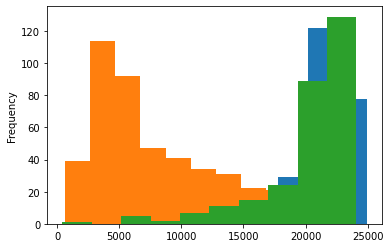

In [26]:
data[data['cancer']==0]['char_count'].plot(kind='hist')
data[data['cancer']==1]['char_count'].plot(kind='hist')
data[data['cancer']==2]['char_count'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

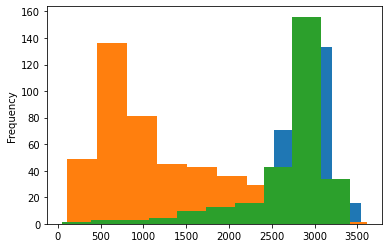

In [27]:
data[data['cancer']==0]['word_count'].plot(kind='hist')
data[data['cancer']==1]['word_count'].plot(kind='hist')
data[data['cancer']==2]['word_count'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

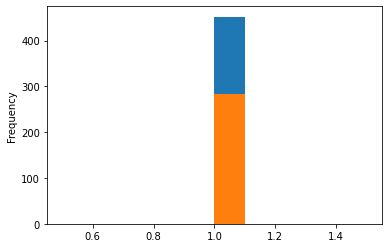

In [28]:
#data[data['cancer']==0]['sentence_count'].plot(kind='hist')
data[data['cancer']==1]['sentence_count'].plot(kind='hist')
data[data['cancer']==2]['sentence_count'].plot(kind='hist')

### In colon cancer  mostly char length and word length is small on the other hand in lung and thyroid cancer mostly char length and word length is large

In [29]:
data[['word_count','sentence_count','char_count']]

,word_count,sentence_count,char_count
0,2012,1,14480
1,1619,1,11054
2,1984,1,14901
3,1261,1,9961
4,2074,1,16717
...,...,...,...
6863,991,1,6505
6929,2148,1,13779
7040,2818,1,22320
7485,2766,1,22415


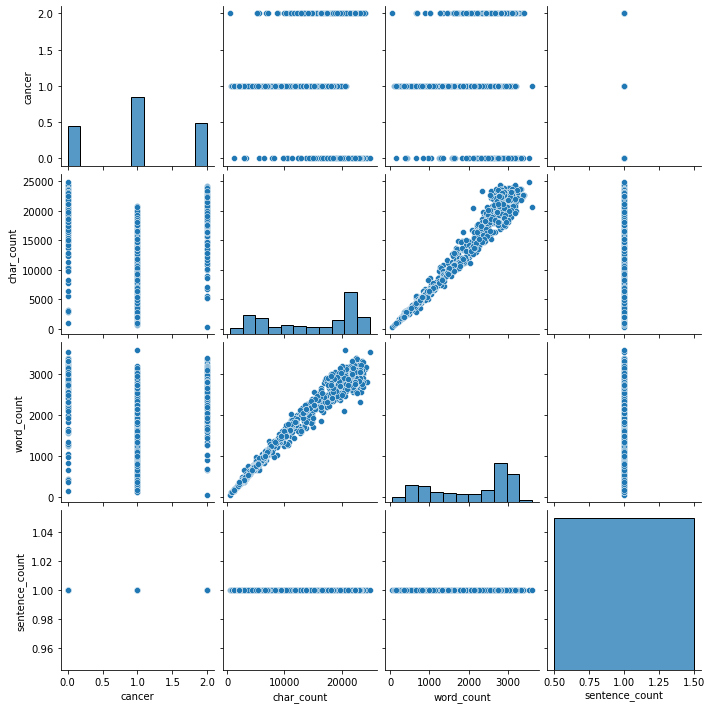

In [30]:
sns.pairplot(data)

# Visualizing most occurant words and the size of words reflects its frequency

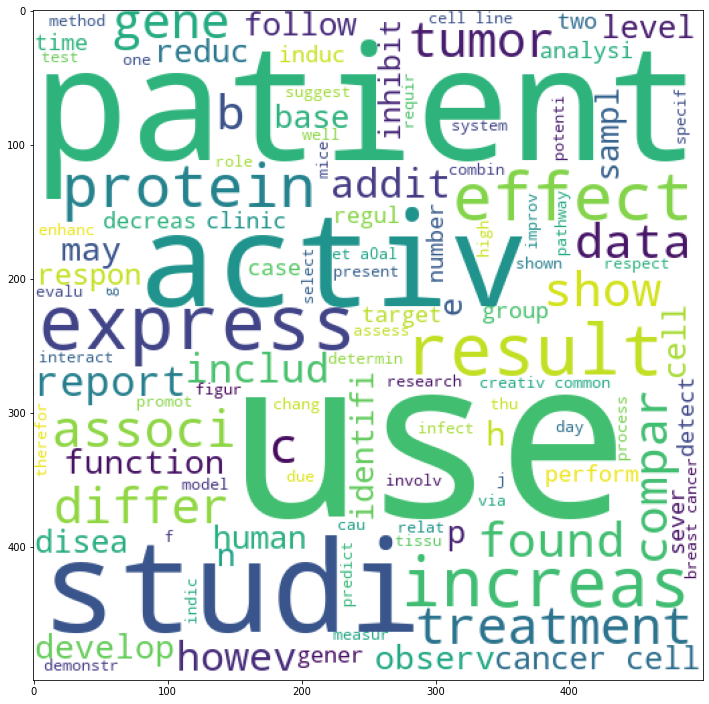

In [31]:
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(data[data['cancer']==0]['text'].str.cat(sep=" "))
plt.imshow(w_c)

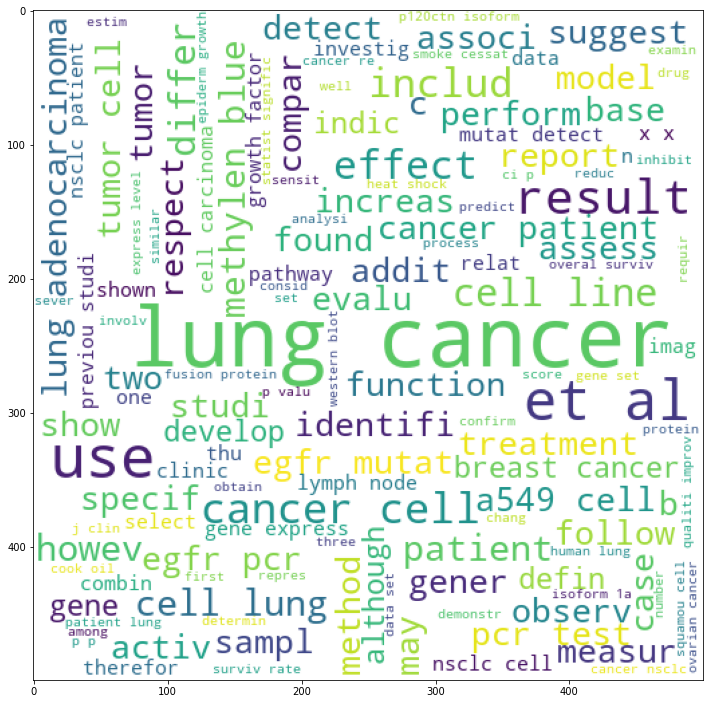

In [32]:
plt.figure(figsize=(12,15))

wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(data[data['cancer']==1]['text'].str.cat(sep=" "))
plt.imshow(w_c)

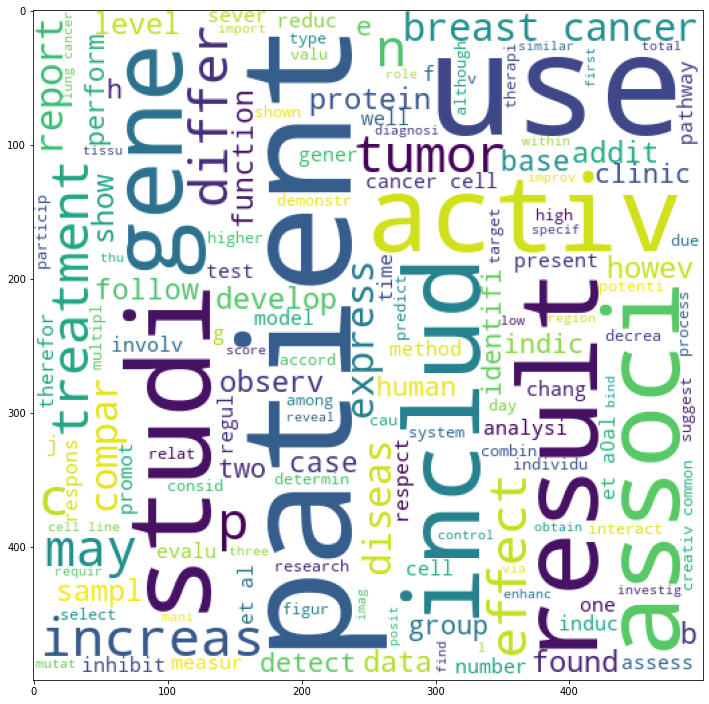

In [33]:
plt.figure(figsize=(12,15))

wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(data[data['cancer']==2]['text'].str.cat(sep=" "))
plt.imshow(w_c)

# Vectorizing , Training and Evaluating the model

In [34]:
#cv=CountVectorizer(max_features=2000,ngram_range=(3,3)) 
tfidf=TfidfVectorizer(max_features=967)
x=tfidf.fit_transform(data['text']).toarray()
y=data['cancer'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=56,stratify=y)
#pca=PCA(n_components=360)
#x_train=pca.fit_transform(x_train)
#x_test=pca.transform(x_test)
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()
def train(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [35]:
#plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [36]:
l=[gb,bb]
for model in l:
    train(model)

GaussianNB()
[[ 35   0  30]
 [  0 111   2]
 [ 35   0  36]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        65
           1       1.00      0.98      0.99       113
           2       0.53      0.51      0.52        71

    accuracy                           0.73       249
   macro avg       0.68      0.68      0.68       249
weighted avg       0.74      0.73      0.73       249

0.7309236947791165
BernoulliNB()
[[ 48   0  17]
 [  1 111   1]
 [ 15   2  54]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        65
           1       0.98      0.98      0.98       113
           2       0.75      0.76      0.76        71

    accuracy                           0.86       249
   macro avg       0.83      0.83      0.83       249
weighted avg       0.86      0.86      0.86       249

0.8554216867469879


# Finally got the real Accuracy,Precision and Recall

# Please upvote if you find this useful